### KNN classifier numpy implementations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
pip install scikit-learn

You should consider upgrading via the 'C:\Users\Subhajit ghosh\python.exe -m pip install --upgrade pip' command.


In [2]:
X = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\X_data.npy")
y = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\Y_data.npy")
print(X.shape , "\n" , y.shape)

(500, 2) 
 (500,)


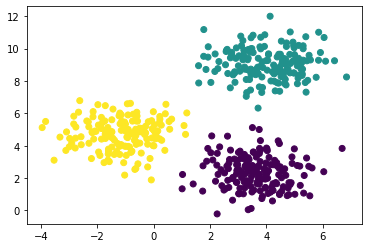

In [3]:
plt.scatter(X[:,0] ,X[:,1] , c = y )
plt.show()

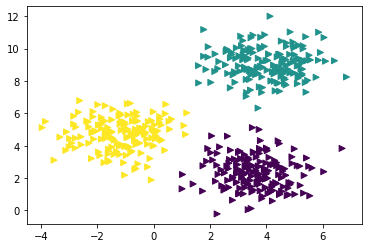

In [5]:
plt.scatter(X[:,0] ,X[:,1] , c = y , marker = ">")
plt.show()

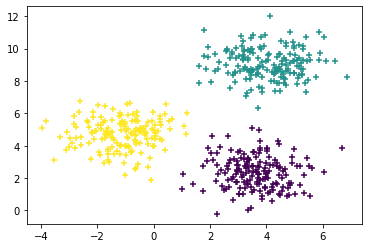

In [6]:
plt.scatter(X[:,0] ,X[:,1] , c = y , marker ="+")######################################################################
plt.show()

In [8]:
y[:10]

array([2, 0, 0, 0, 0, 1, 2, 0, 1, 2])

In [4]:
color_map = {
    0 :np.array( (235 , 64,52 ))/255,
    1:np.array( (52 , 235 , 104))/255,##############################################################################
    2:np.array((219 , 92 , 122))/255
}
colors = [color_map[label] for label in y]     ## list comprehension
print(colors[:10])

[array([0.85882353, 0.36078431, 0.47843137]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.20392157, 0.92156863, 0.40784314]), array([0.85882353, 0.36078431, 0.47843137]), array([0.92156863, 0.25098039, 0.20392157]), array([0.20392157, 0.92156863, 0.40784314]), array([0.85882353, 0.36078431, 0.47843137])]


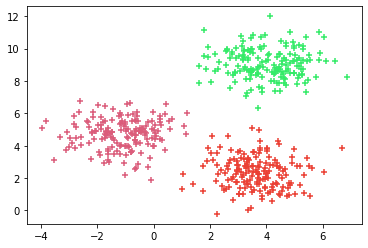

In [12]:
plt.scatter(X[:,0] ,X[:,1] , c = colors , marker = "+")
plt.show()

### split our data in traing and test set

## we want to split the data
## numpy - it is used for mathematical computation
## sklearn - have ML algo pre written

In [5]:
#from sklearn.model_selection import train_test_split
# we want to split data 
from sklearn.model_selection import train_test_split########################################################################

In [6]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)
##################################### random_state hepl to reprodue the state , with this the value will not changed

In [30]:
print(y_train[:10]) ##############################################sequence of number is changing

[1 2 0 0 2 0 2 0 1 1]


In [35]:
print(X_train.shape , X_test.shape , y_train.shape ,y_test.shape)

(400, 2) (100, 2) (400,) (100,)


## implementation ofKNN algo using numpy
1.compute the distance btw each point and test point
2. sort the distance and take k values
3.find the category , frequency of the point
4.predict the label and confidence

In [14]:
class KNNclassifier:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self , X , y):
        self.xtrain = X     ## as in KNN there is no real training w are just passing the reference here
        self.ytrain = y
        
    def predict(self ,X_test):   
        # compute distance
        for tp in X_test:    ## tp represent each row in X_Test
            distance = np.linalg.norm(self.xtrain - tp ,ord = 2, axis = 1) ########## ord = 2 means euclidean norm it is calculated
            knn_idx = np.argsort(distance)[:self.k] #####################return the index only np.argsort
            knn_cat = self.ytrain[knn_idx]
            
    def accuracy(self, pred, y_test):
        return (pred==y_test).mean()


In [8]:
a = np.array([1,2])  #tp
b = np.array([3,1])  #x_train[i]
np.linalg.norm(a - b) # equal equlidean distance or l2 norm

2.23606797749979

## How to set K

In [15]:
ks = [1, 3, 5, 7, 9, 11, 51, 101, 201, 301, 400]
train_accs = []
test_accs = []
for i, k in enumerate(ks):         ## #########################################   enumerate returns a array of index and val
    model = KNNclassifier(k)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.accuracy(train_pred, y_train)
    test_pred = model.predict(X_test)
    test_acc = model.accuracy(test_pred, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"K: {k}, Training accuracy: {train_acc}, Test Accuracy: {test_acc}")

K: 1, Training accuracy: 0.0, Test Accuracy: 0.0
K: 3, Training accuracy: 0.0, Test Accuracy: 0.0
K: 5, Training accuracy: 0.0, Test Accuracy: 0.0
K: 7, Training accuracy: 0.0, Test Accuracy: 0.0
K: 9, Training accuracy: 0.0, Test Accuracy: 0.0
K: 11, Training accuracy: 0.0, Test Accuracy: 0.0
K: 51, Training accuracy: 0.0, Test Accuracy: 0.0
K: 101, Training accuracy: 0.0, Test Accuracy: 0.0
K: 201, Training accuracy: 0.0, Test Accuracy: 0.0
K: 301, Training accuracy: 0.0, Test Accuracy: 0.0
K: 400, Training accuracy: 0.0, Test Accuracy: 0.0


In [ ]:
np.linalg.norm(self.X - tp)

In [9]:
a = np.array([1 , 2])
b = np.array([[3 , 1] , [4 , 4]]) ###########################################################
print(b)
np.linalg.norm(b - a , axis = 1) ################################ we need to have for each test point and array point

[[3 1]
 [4 4]]


array([2.23606798, 3.60555128])

In [38]:
b - a

array([[ 2, -1],
       [ 3,  2]])

In [40]:
a = [1 , 4 ,5 ,2 ,7 ,8]
sorted(a)

[1, 2, 4, 5, 7, 8]

In [41]:
np.argsort(a)   ## it just return the index of sorted array

array([0, 3, 1, 2, 4, 5], dtype=int64)

In [43]:
a = [ 34 , 54, 90 , 93 , 56]
b = np.array([1 , 3])
print(a[b])

TypeError: only integer scalar arrays can be converted to a scalar index